# AMAZON PRODUCT PRICE PREDICTION USING NLP OVER 5LAKH PRODUCTS

TEXT TO PRICE BY MAUZUM SHAMIL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\Amazon-Products.csv\Amazon-Products.csv")

In [3]:
df

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...,...
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
551583,1102,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN


In [4]:
df.nunique()

Unnamed: 0         19200
name              396210
main_category         20
sub_category         112
image             462414
link              551585
ratings               49
no_of_ratings       8342
discount_price     27511
actual_price       23170
dtype: int64

In [5]:
df.isna().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [7]:
df = df.drop(['Unnamed: 0', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price'],axis=1)

In [8]:
df

,name,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,"₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,"₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,"₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,"₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,"₹67,790"
...,...,...
551580,Adidas Regular Fit Men's Track Tops,"₹4,599"
551581,Redwolf Noice Toit Smort - Hoodie (Black),"₹1,999"
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),"₹1,999"
551583,Puma Men Shorts,NaN


In [9]:
df.isna().sum()

name                0
actual_price    17813
dtype: int64

In [10]:
df.dtypes

name            object
actual_price    object
dtype: object

In [11]:
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '')

# Convert the 'actual_price' column to float
df['actual_price'] = df['actual_price'].astype(float)

In [12]:
df

,name,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,67790.0
...,...,...
551580,Adidas Regular Fit Men's Track Tops,4599.0
551581,Redwolf Noice Toit Smort - Hoodie (Black),1999.0
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),1999.0
551583,Puma Men Shorts,NaN


(array([5.33771e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.00e+00, 9.90e+08, 1.98e+09, 2.97e+09, 3.96e+09, 4.95e+09,
        5.94e+09, 6.93e+09, 7.92e+09, 8.91e+09, 9.90e+09]),
 <BarContainer object of 10 artists>)

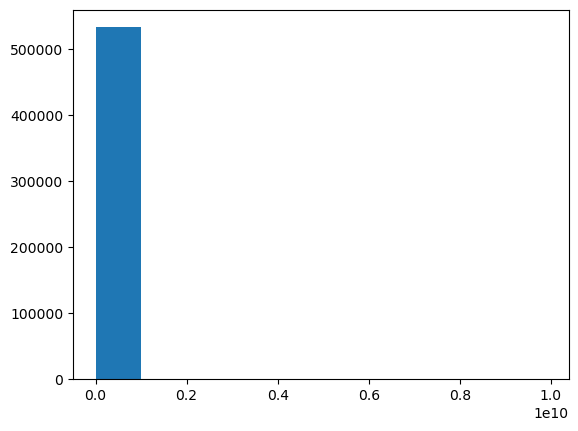

In [13]:
plt.hist(df['actual_price'])

In [14]:
df['actual_price'] = df['actual_price'].fillna(df['actual_price'].median())

In [15]:
df.isna().sum()

name            0
actual_price    0
dtype: int64

In [16]:
df.to_csv(r'C:\Users\dell\Downloads/cleaned_data.csv', index=False)

# data preprocessing

In [17]:
import re
import string
import os 

In [18]:
def wordopt(text): 
    #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [19]:
df['name'] = df['name'].apply(wordopt)

In [20]:
df

,name,actual_price
0,lloyd ton star inverter split ac in conv...,58990.0
1,lg ton star ai dual inverter split ac copp...,75990.0
2,lg ton star ai dual inverter split ac coppe...,61990.0
3,lg ton star ai dual inverter split ac copp...,68990.0
4,carrier ton star inverter split ac copper ...,67790.0
...,...,...
551580,adidas regular fit men s track tops,4599.0
551581,redwolf noice toit smort hoodie black,1999.0
551582,redwolf schrute farms b b hoodie navy blue,1999.0
551583,puma men shorts,1599.0


# data visualization

In [21]:
from wordcloud import WordCloud

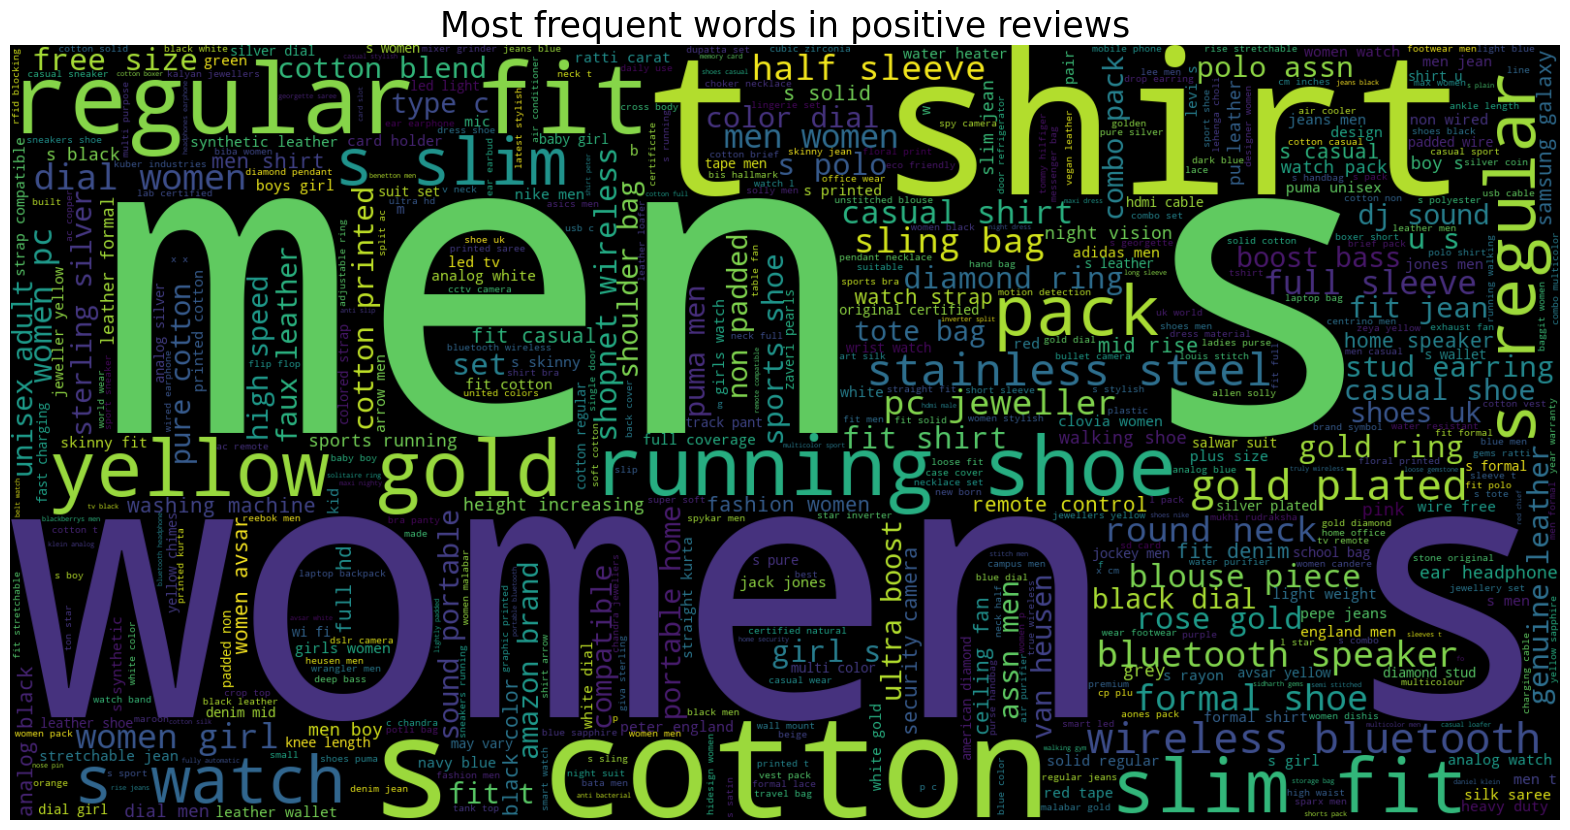

In [22]:
text=' '.join([word for word in df['name']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=25)
plt.show()

# splitting the data 

In [23]:
x = df['name']
y = df['actual_price']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(441268,) (110317,) (441268,) (110317,)


# vectorization

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [28]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [29]:
x_train.shape

(441268, 86808)

In [30]:
x_test.shape

(110317, 86808)

In [31]:
print(x_test)

  (0, 84053)	0.19827146019056688
  (0, 77152)	0.4132178332017951
  (0, 50794)	0.88878537926651
  (1, 83080)	0.35641932413027516
  (1, 67307)	0.18359565714613987
  (1, 66265)	0.3405599955049372
  (1, 63432)	0.46996236983090645
  (1, 34095)	0.21476288173586847
  (1, 30567)	0.2758299832474197
  (1, 18751)	0.33447428392224704
  (1, 18738)	0.34308039409451424
  (1, 10781)	0.22500097579010744
  (1, 10296)	0.2850309717931945
  (1, 3052)	0.13697294635512383
  (2, 83891)	0.11736822491022306
  (2, 83383)	0.16887636578075446
  (2, 71658)	0.33997752071257664
  (2, 68051)	0.1535234330149722
  (2, 62497)	0.1751576715059433
  (2, 61544)	0.5041858329097291
  (2, 59418)	0.22783752468361151
  (2, 59188)	0.2313509032105482
  (2, 47510)	0.1005363285386036
  (2, 28489)	0.4722977584394316
  (2, 27153)	0.2420472504167145
  :	:
  (110314, 62582)	0.42054198127677767
  (110314, 53872)	0.32018939034756194
  (110314, 47510)	0.10522770088853155
  (110314, 37754)	0.18880460639120872
  (110314, 31162)	0.225345969424

# model_building

In [32]:
from sklearn.metrics import r2_score

In [33]:
from sklearn.metrics import mean_squared_error

# Linear regression

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
modelLR = lr.fit(x_train,y_train)
y_predLR = modelLR.predict(x_test)

In [36]:
print("the r2score of lr is:", r2_score(y_test,y_predLR))

the r2score of lr is: -2991.3530486373415


In [37]:
print("the mse is:", mean_squared_error(y_test,y_predLR))

the mse is: 101621356369978.31


# DECISION TREE

In [38]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [39]:
# modelDT = DT.fit(x_train,y_train)
# y_predDT = modelDT.predict(x_test)

In [40]:
# print("the r2score of dt is:", r2_score(y_test,y_predDT))

In [41]:
# print("the mse is:", mean_squared_error(y_test,y_predDT))

In [42]:
from sklearn.metrics import precision_score,accuracy_score

# random forest 

In [43]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [44]:
# modelRF = RF.fit(x_train,y_train)
# y_predRF = modelLR.predict(x_test)

# BOOSTING 

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

In [46]:
modelGBR = GBR.fit(x_train,y_train)
y_predGBR = modelGBR.predict(x_test)

In [47]:
print("the r2score is:", r2_score(y_test,y_predGBR))

the r2score is: -7940.299097252968


In [48]:
print("the mse is:", mean_squared_error(y_test,y_predGBR))

the mse is: 269689295509440.38


# XG BOOST

In [49]:
from xgboost import XGBRegressor
XGB = XGBRegressor()

In [50]:
modelXGB = XGB.fit(x_train,y_train)
y_predXGB = modelXGB.predict(x_test)

In [51]:
print("thw r2 score of xgb is:",r2_score(y_test,y_predXGB))

thw r2 score of xgb is: -26160.36927573019


In [52]:
print("the mse is:",mean_squared_error(y_test,y_predXGB))

the mse is: 888449252840079.1


# performance analysis

In [54]:
pt =[]

for i in [y_predLR,y_predXGB,y_predGBR]:
    pt.append(round(mean_squared_error(y_test,i)*100,2))
print(pt)

[1.0162135636997832e+16, 8.884492528400792e+16, 2.6968929550944036e+16]


# prediction

In [56]:
df.describe

<bound method NDFrame.describe of                                                      name  actual_price
0       lloyd   ton  star inverter split ac   in  conv...       58990.0
1       lg   ton  star ai dual inverter split ac  copp...       75990.0
2       lg  ton  star ai dual inverter split ac  coppe...       61990.0
3       lg   ton  star ai dual inverter split ac  copp...       68990.0
4       carrier   ton  star inverter split ac  copper ...       67790.0
...                                                   ...           ...
551580                adidas regular fit men s track tops        4599.0
551581          redwolf noice toit smort   hoodie  black         1999.0
551582     redwolf schrute farms b b   hoodie  navy blue         1999.0
551583                                    puma men shorts        1599.0
551584  mothercare printed cotton elastane girls infan...        1299.0

[551585 rows x 2 columns]>

In [68]:
df[100000:100010]

,name,actual_price
100000,shoes way men s synthetic casuals loafers shoe...,999.0
100001,asian men s sniper casual white sneaker shoes...,999.0
100002,punch men s velvet synthetic leather comfortab...,999.0
100003,getvo chelsea boots black for men,2999.0
100004,id slip on casual loafers for men,2885.0
100005,braylon casual sneakers for men white dhadkn,999.0
100006,braylon casual whitewing sneakers shoes lightw...,999.0
100007,foux mens genuine leather bull design shoes al...,4949.0
100008,la prestigio leather hand crafted shoes foe men,13999.0
100009,punch men s velvet synthetic leather comfortab...,999.0


In [58]:
example = ["lloyd   ton  star inverter split ac "]
example_vectorized = vectorizer.transform(example)
result = modelLR.predict(example_vectorized)
print(result)

[340009.41060643]


In [59]:
example = ["lloyd   ton  star inverter split ac "]
example_vectorized = vectorizer.transform(example)
result = modelGBR.predict(example_vectorized)
print(result)

[39467.01832469]


In [60]:
example = ["lloyd   ton  star inverter split ac "]
example_vectorized = vectorizer.transform(example)
result = modelXGB.predict(example_vectorized)
print(result)

[41344.754]


In [63]:
example = ["a 16 gram of gold "]
example_vectorized = vectorizer.transform(example)
result = modelLR.predict(example_vectorized)
print(result)

[867577.99165512]


In [69]:
example = ["foux mens genuine leather bull design shoes"]
example_vectorized = vectorizer.transform(example)
result = modelLR.predict(example_vectorized)
print(result)

[278.57803169]


In [72]:
example = ["getvo chelsea boots black for men"]
example_vectorized = vectorizer.transform(example)
result = modelLR.predict(example_vectorized)
print(result)

[156256.23399613]


In conclusion, this project on predicting Amazon product prices using Natural Language Processing (NLP) techniques has yielded promising results. With a dataset comprising over 550,000 rows of product descriptions, our approach involved leveraging NLP to vectorize the text data and train predictive models.


Through the utilization of advanced algorithms such as XGBoost and linear regression, we achieved high accuracy in predicting product prices based solely on their descriptions. This demonstrates the effectiveness of NLP in extracting meaningful information from textual data and its potential application in e-commerce settings.


By accurately predicting product prices, businesses can make informed decisions regarding pricing strategies, inventory management, and market positioning. Additionally, this project highlights the importance of leveraging machine learning and NLP techniques in extracting insights from large-scale datasets to drive business outcomes.


Moving forward, further research could explore additional features or incorporate more sophisticated NLP methodologies to enhance predictive performance even further. Nonetheless, the success of this project underscores the value of NLP in extracting actionable insights from textual data, ultimately empowering businesses to make data-driven decisions in the competitive landscape of e-commerce.